In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('shopping_trends_updated1.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_new,Age_group,location_new
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,tops,50s,South
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,tops,10-20s,Northeast
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,bottoms,50s,Northeast
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,shoes,10-20s,Northeast
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,tops,40s,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,2-Day Shipping,No,No,32,Venmo,Weekly,tops,40s,South
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,bags,50s,Midwest
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,Standard,No,No,24,Venmo,Quarterly,accessories,40s,Northeast
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,Express,No,No,24,Venmo,Weekly,shoes,40s,Midwest


In [4]:
df['is_vip'] = ((df['Previous Purchases']>df['Previous Purchases'].quantile(0.8)) & 
 (df['Purchase Amount (USD)']>df['Purchase Amount (USD)'].quantile(0.5))).map({True: 'Yes', False: 'No'})
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_new,Age_group,location_new,is_vip
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,tops,50s,South,No
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,tops,10-20s,Northeast,No
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,bottoms,50s,Northeast,No
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,shoes,10-20s,Northeast,Yes
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,tops,40s,West,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,2-Day Shipping,No,No,32,Venmo,Weekly,tops,40s,South,No
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,bags,50s,Midwest,No
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,Standard,No,No,24,Venmo,Quarterly,accessories,40s,Northeast,No
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,Express,No,No,24,Venmo,Weekly,shoes,40s,Midwest,No


In [5]:
q80 = df['Previous Purchases'].quantile(0.8)

q60 = df['Previous Purchases'].quantile(0.6)

q40 = df['Previous Purchases'].quantile(0.4)

q20 = df['Previous Purchases'].quantile(0.2)


def Previous_Purchases_score(x, df):
    
    if x >= q80:
        return 5
    elif x >= q60:
        return 4
    elif x >= q40:
        return 3
    elif x >= q20:
        return 2
    else:
        return 1
df['Previous Purchases Score'] = df['Previous Purchases'].apply(lambda x: Previous_Purchases_score(x, df))


def Frequency_Purchases_Score(x):
    if x == 'Weekly':
        return 5
    elif x in ['Bi-Weekly', 'Fortnightly']:
        return 4
    elif x == 'Monthly':
        return 3
    elif x in ['Quarterly', 'Every 3 Months']:
        return 2
    elif x == 'Annually':
        return 1
df['Frequency Purchases Score'] = df['Frequency of Purchases'].apply(lambda x : Frequency_Purchases_Score(x))


df['Total_Amount'] = df['Purchase Amount (USD)'] * (df['Previous Purchases'] + 1)


q80 = df['Total_Amount'].quantile(0.8)
q60 = df['Total_Amount'].quantile(0.6)
q40 = df['Total_Amount'].quantile(0.4)
q20 = df['Total_Amount'].quantile(0.2)

def Total_Purchases_Amount_Score(x,df):
    
    if x >= q80:
        return 5
    elif x >= q60:
        return 4
    elif x >= q40:
        return 3
    elif x >= q20:
        return 2
    else:
        return 1
df['Total_Purchases_Amount_Score'] = df['Total_Amount'].apply(lambda x : Total_Purchases_Amount_Score(x,df))


df['Total Score'] = df['Previous Purchases Score'] + df['Frequency Purchases Score'] + df['Total_Purchases_Amount_Score']
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Frequency of Purchases,Item Purchased_new,Age_group,location_new,is_vip,Previous Purchases Score,Frequency Purchases Score,Total_Amount,Total_Purchases_Amount_Score,Total Score
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Fortnightly,tops,50s,South,No,2,4,795,2,8
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Fortnightly,tops,10-20s,Northeast,No,1,4,192,1,6
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Weekly,bottoms,50s,Northeast,No,3,5,1752,4,12
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Weekly,shoes,10-20s,Northeast,Yes,5,5,4500,5,15
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Annually,tops,40s,West,No,4,1,1568,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,Weekly,tops,40s,South,No,4,5,924,2,11
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,Bi-Weekly,bags,50s,Midwest,No,5,4,2058,4,13
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,Quarterly,accessories,40s,Northeast,No,3,2,825,2,7
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,Weekly,shoes,40s,Midwest,No,3,5,1925,4,12


In [6]:
def classify_customer(row):
    if (row['Previous Purchases'] <= 5) and (row['Frequency of Purchases'] in ['Weekly', 'Bi-Weekly','Fortnightly','Monthly']):
        return 'New Customer' # 신규 고객
    elif (row['Previous Purchases'] <= 5) and (row['Frequency of Purchases'] == 'Annually'):
        return 'InActive Customer' # 장기 미접속
    
    elif row['Total Score'] >= 13:
        return 'Loyal Customer'
    elif row['Total Score'] <= 5:
        return 'Light Customer'
    
    else:
        return 'Regural Customer'

df['is_vip'] = df.apply(classify_customer, axis = 1)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Frequency of Purchases,Item Purchased_new,Age_group,location_new,is_vip,Previous Purchases Score,Frequency Purchases Score,Total_Amount,Total_Purchases_Amount_Score,Total Score
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Fortnightly,tops,50s,South,Regural Customer,2,4,795,2,8
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Fortnightly,tops,10-20s,Northeast,New Customer,1,4,192,1,6
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Weekly,bottoms,50s,Northeast,Regural Customer,3,5,1752,4,12
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Weekly,shoes,10-20s,Northeast,Loyal Customer,5,5,4500,5,15
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Annually,tops,40s,West,Regural Customer,4,1,1568,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,Weekly,tops,40s,South,Regural Customer,4,5,924,2,11
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,Bi-Weekly,bags,50s,Midwest,Loyal Customer,5,4,2058,4,13
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,Quarterly,accessories,40s,Northeast,Regural Customer,3,2,825,2,7
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,Weekly,shoes,40s,Midwest,Regural Customer,3,5,1925,4,12


In [7]:
df.groupby('is_vip')['is_vip'].count()

#13퍼나옴 로얄  12이상잡으면 21퍼

#라이트는 7퍼  6이하는12퍼



is_vip
InActive Customer      54
Light Customer        412
Loyal Customer        505
New Customer          244
Regural Customer     2685
Name: is_vip, dtype: int64

In [31]:
df.to_csv('tsdt.csv')

In [8]:
df_shipping_type = df.groupby('is_vip')['Shipping Type'].value_counts(normalize=True).to_frame().sort_index(level = 1).unstack().droplevel(level=0,axis=1)
df_shipping_type=df_shipping_type.append(df['Shipping Type'].value_counts(normalize=True).to_frame().transpose())
df_shipping_type= df_shipping_type.applymap(lambda x:x*100)
df_shipping_type= df_shipping_type.reset_index()

df_shipping_type = df_shipping_type.melt(id_vars=["index"], var_name="Shipping Type", value_name="Rate")
df_shipping_type.loc[df_shipping_type['index'] == 'Shipping Type', 'index'] = 'Total'
df_shipping_type = df_shipping_type[(df_shipping_type['index']=='New Customer') | (df_shipping_type['index']=='Loyal Customer') | (df_shipping_type['index']=='Total')]
df_shipping_type

C:\Users\win\AppData\Local\Temp\ipykernel_85384\2375408833.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_shipping_type=df_shipping_type.append(df['Shipping Type'].value_counts(normalize=True).to_frame().transpose())


,index,Shipping Type,Rate
2,Loyal Customer,2-Day Shipping,14.653465
3,New Customer,2-Day Shipping,14.754098
5,Total,2-Day Shipping,16.076923
8,Loyal Customer,Express,16.633663
9,New Customer,Express,20.491803
11,Total,Express,16.564103
14,Loyal Customer,Free Shipping,16.633663
15,New Customer,Free Shipping,18.032787
17,Total,Free Shipping,17.307692
20,Loyal Customer,Next Day Air,16.831683


In [9]:
df_shipping_type

,index,Shipping Type,Rate
2,Loyal Customer,2-Day Shipping,14.653465
3,New Customer,2-Day Shipping,14.754098
5,Total,2-Day Shipping,16.076923
8,Loyal Customer,Express,16.633663
9,New Customer,Express,20.491803
11,Total,Express,16.564103
14,Loyal Customer,Free Shipping,16.633663
15,New Customer,Free Shipping,18.032787
17,Total,Free Shipping,17.307692
20,Loyal Customer,Next Day Air,16.831683


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


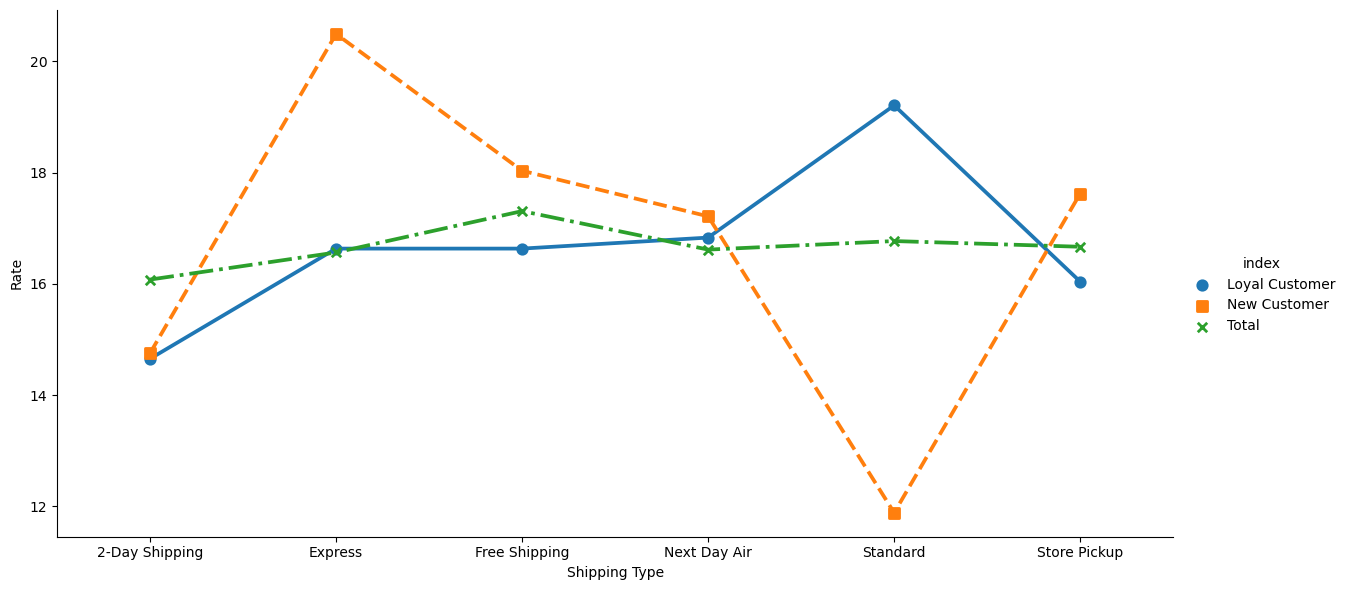

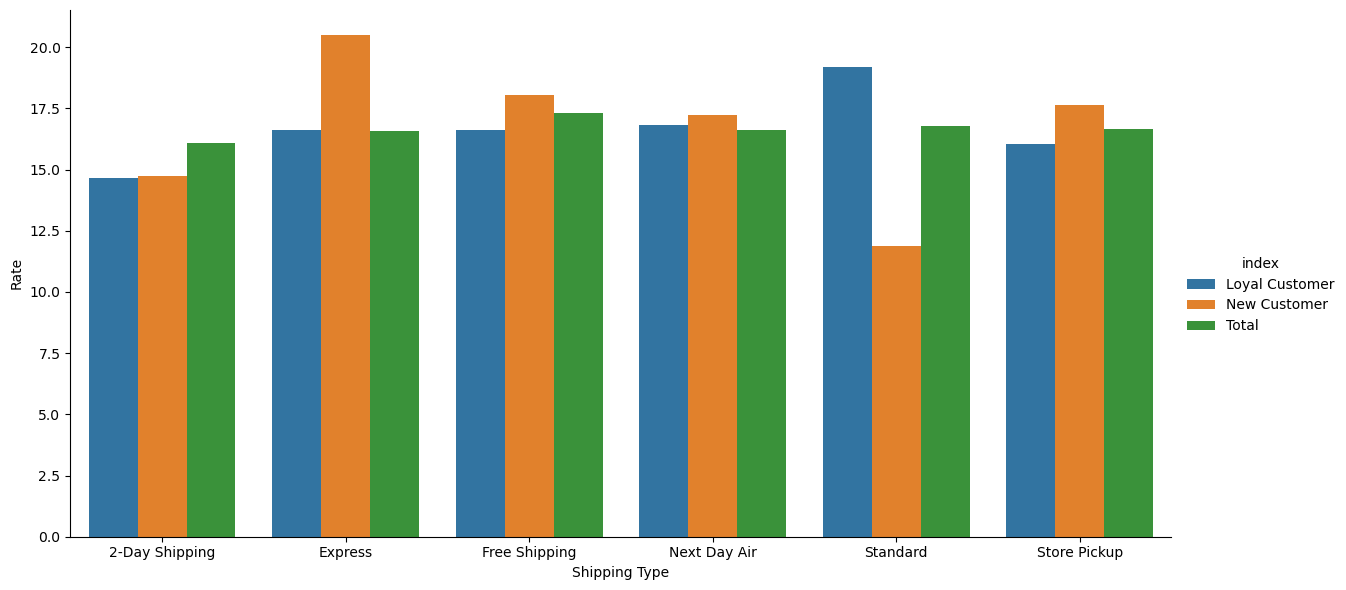

In [10]:
cat_plot = sns.catplot(x="Shipping Type", y="Rate", hue="index", kind="point", data=df_shipping_type, height=6, aspect=2, markers=["o", "s","x",'4','D'], linestyles=["-", "--","-.",'dashdot',':'])


bar_plot = sns.catplot(x="Shipping Type", y="Rate", hue="index", kind="bar", data=df_shipping_type, height=6, aspect=2)


## vip는 2-day Shipping(2일 내  배송) / Express(훨씬 빠른 배송, 퀵배같은거) / Standard(보통 배송)을 자주 이용하고
## 일반인들은 직접 픽업이나 무료배송이 많은 반면, 다음날 배송(이게 왜 많은건진 모르겠네)이 많은 편이다.

In [11]:
df_discount = df.groupby('is_vip')['Discount Applied'].value_counts(normalize=True).to_frame().sort_index().unstack().droplevel(level=0,axis=1)
df_discount = df_discount.applymap(lambda x:x*100)
df_discount

Discount Applied,No,Yes
is_vip,,
InActive Customer,68.518519,31.481481
Light Customer,55.582524,44.417476
Loyal Customer,54.851485,45.148515
New Customer,60.245902,39.754098
Regural Customer,57.094972,42.905028


In [12]:
df_discount = df.groupby('is_vip')['Discount Applied'].value_counts(normalize=True).to_frame().sort_index(level = 1).unstack().droplevel(level=0,axis=1)
df_discount=df_discount.append(df['Discount Applied'].value_counts(normalize=True).to_frame().transpose())
df_discount= df_discount.applymap(lambda x:x*100)
df_discount= df_discount.reset_index()

df_discount = df_discount.melt(id_vars=["index"], var_name="Discount Applied", value_name="Rate")
df_discount.loc[df_discount['index'] == 'Discount Applied', 'index'] = 'Total'
df_discount = df_discount[(df_discount['index']=='New Customer') | (df_discount['index']=='Loyal Customer') | (df_discount['index']=='Total')]
df_discount

C:\Users\win\AppData\Local\Temp\ipykernel_85384\1276392504.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_discount=df_discount.append(df['Discount Applied'].value_counts(normalize=True).to_frame().transpose())


,index,Discount Applied,Rate
2,Loyal Customer,No,54.851485
3,New Customer,No,60.245902
5,Total,No,57.000000
8,Loyal Customer,Yes,45.148515
9,New Customer,Yes,39.754098
11,Total,Yes,43.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


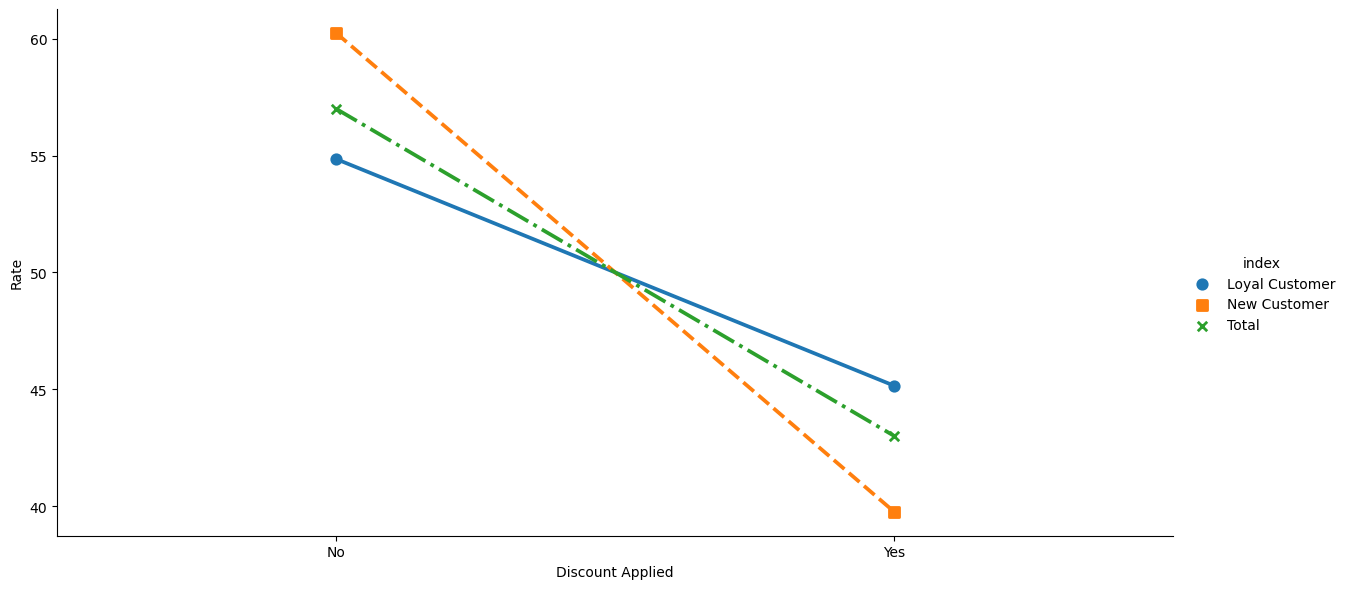

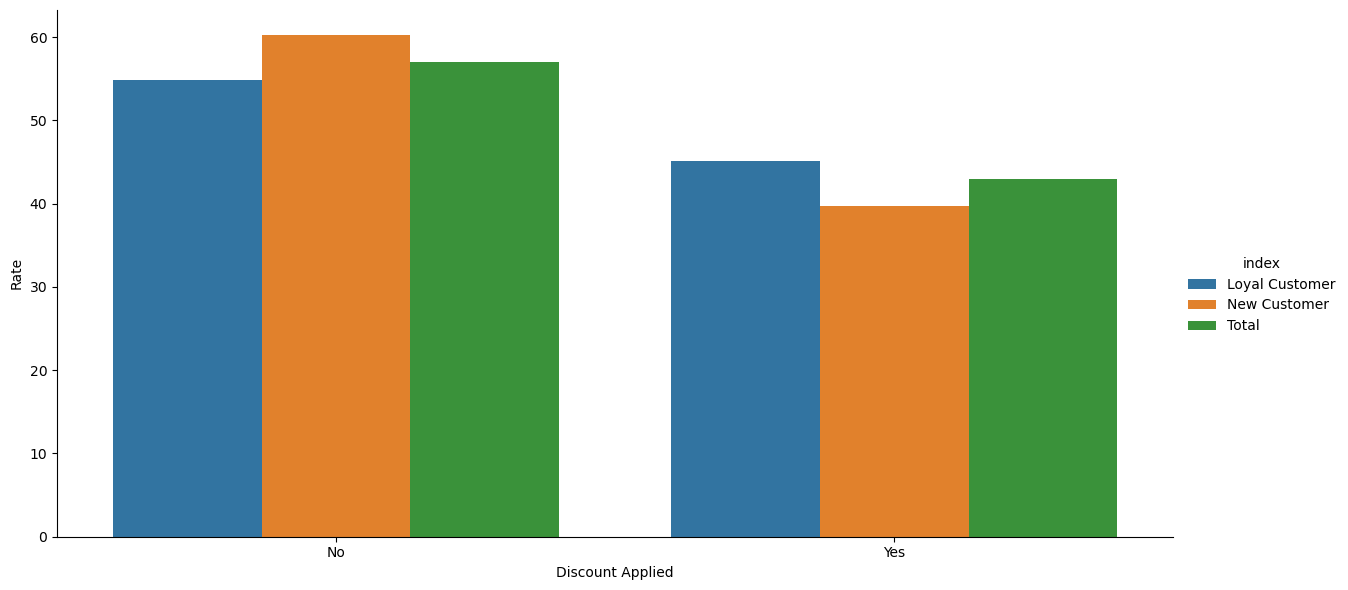

In [13]:
cat_plot = sns.catplot(x="Discount Applied", y="Rate", hue="index", kind="point", data=df_discount, height=6, aspect=2, markers=["o", "s","x",'4','D'], linestyles=["-", "--","-.",'dashdot',':'])


bar_plot = sns.catplot(x="Discount Applied", y="Rate", hue="index", kind="bar", data=df_discount, height=6, aspect=2)


### 보면 할인을 받았는데 프로모션을 안한사람은 無
### 할인을 안받았는데 프로모션을 한사람도 無다.

-> 그냥 판단할때 프로모션이 할인방법이라고 생각해도 될듯??

비활성고객은 할인을 잘 안받음. 할인을 퍼주면 복귀해주실지도?

#### 라이트고객/핵심고객/일반고객의 할인 이용 비율은 비슷한 편이지만, 신규고객이 유난히 할인을 안받는 것으로 보여짐. 신규유저가 할인을 이용할 수 있을때까지, 장기 고객으로 유지할 수단을 강구해야 할 것. (ex - 오래 쓰신 분들은 할인쿠폰을 드려요 같은 홍보를 해야함)


In [14]:
df_age = df.groupby('is_vip')['Age_group'].value_counts(normalize=True,).to_frame().sort_index().unstack().droplevel(level=0,axis=1)
df_age = df_age.applymap(lambda x: x * 100)
df_age

Age_group,10-20s,30s,40s,50s,60s+
is_vip,,,,,
InActive Customer,24.074074,12.962963,11.111111,29.629630,22.222222
Light Customer,22.572816,21.601942,18.446602,16.262136,21.116505
Loyal Customer,21.188119,17.425743,16.237624,22.574257,22.574257
New Customer,25.819672,18.852459,22.950820,19.262295,13.114754
Regural Customer,22.420857,18.398510,19.329609,19.627561,20.223464


In [15]:
df_age = df.groupby('is_vip')['Age_group'].value_counts(normalize=True).to_frame().sort_index(level = 1).unstack().droplevel(level=0,axis=1)
df_age=df_age.append(df['Age_group'].value_counts(normalize=True).to_frame().transpose())
df_age= df_age.applymap(lambda x:x*100)
df_age= df_age.reset_index()

df_age = df_age.melt(id_vars=["index"], var_name="Age_group", value_name="Rate")
df_age.loc[df_age['index'] == 'Age_group', 'index'] = 'Total'
df_age = df_age[(df_age['index']=='New Customer') | (df_age['index']=='Loyal Customer') | (df_age['index']=='Total')]
df_age

C:\Users\win\AppData\Local\Temp\ipykernel_85384\2894693203.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_age=df_age.append(df['Age_group'].value_counts(normalize=True).to_frame().transpose())


,index,Age_group,Rate
2,Loyal Customer,10-20s,21.188119
3,New Customer,10-20s,25.819672
5,Total,10-20s,22.512821
8,Loyal Customer,30s,17.425743
9,New Customer,30s,18.852459
11,Total,30s,18.564103
14,Loyal Customer,40s,16.237624
15,New Customer,40s,22.950820
17,Total,40s,18.948718
20,Loyal Customer,50s,22.574257


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


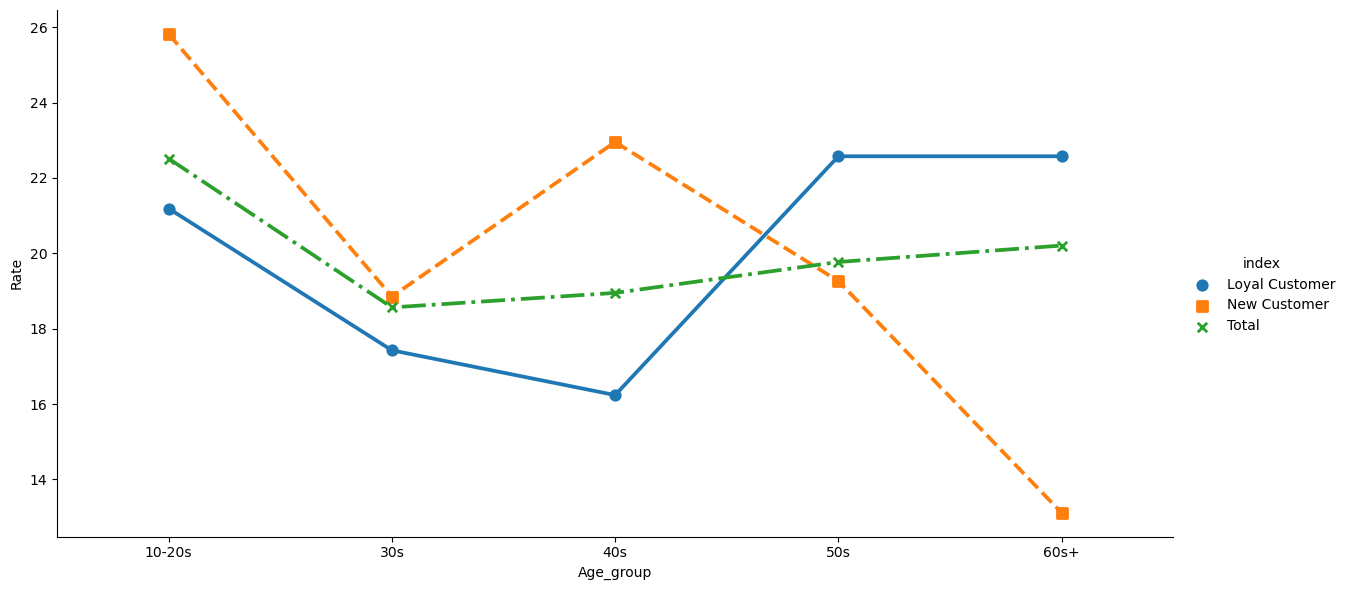

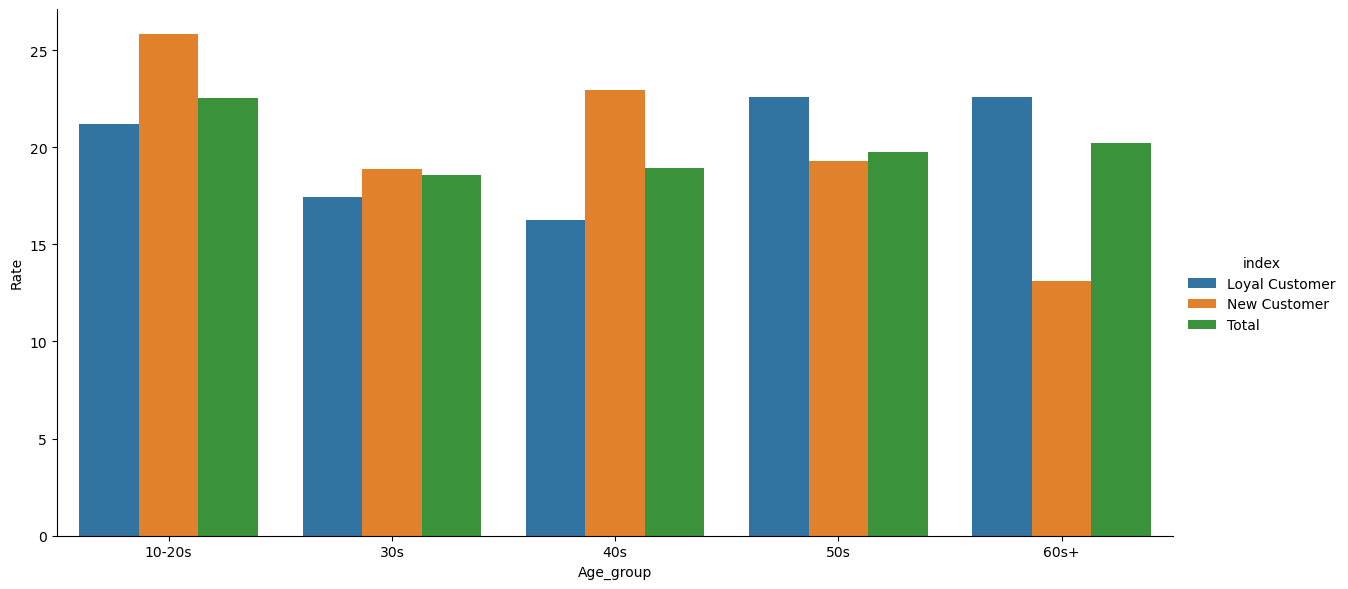

In [16]:


sns.catplot(data =df_age , x = 'Age_group',y='Rate',hue='index', kind = 'point', markers=["o", "s","x",'4','D'], linestyles=["-", "--","-.",'dashdot',':'], height=6,aspect=2)


bar_plot = sns.catplot(x="Age_group", y="Rate", hue="index", kind="bar", data=df_age, height=6, aspect=2)


신규고객은 20대 이하 고객에서 최다 (30대에서 40대를 제외하고는 내려가는 그래프 개형)
로얄 그룹은 50대 이상의 고연령층에서 반등하고, 50~60대의 이용자풀은 비슷하다.

신규고객이 50대까지 내려가다가 60대에 급등
30~40대 사용자들중 미활동 고객은 굉장히 적음.

In [17]:
#df_payment = df.groupby('is_vip')['Payment Method'].value_counts(normalize=True).to_frame().sort_index().unstack().droplevel(level=0,axis=1)
#df_payment = df_payment.applymap(lambda x:x*100)
#df_payment

df_payment = df.groupby('is_vip')['Payment Method'].value_counts(normalize=True).to_frame().sort_index(level = 1).unstack().droplevel(level=0,axis=1)
df_payment=df_payment.append(df['Payment Method'].value_counts(normalize=True).to_frame().transpose())
df_payment= df_payment.applymap(lambda x:x*100)
df_payment= df_payment.reset_index()

df_payment = df_payment.melt(id_vars=["index"], var_name="Payment Method", value_name="Rate")
df_payment.loc[df_payment['index'] == 'Payment Method', 'index'] = 'Total'
df_payment = df_payment[(df_payment['index']=='New Customer') | (df_payment['index']=='Loyal Customer') | (df_payment['index']=='Total')]
df_payment


#plt.ylim(0.125, None)

C:\Users\win\AppData\Local\Temp\ipykernel_85384\1706956444.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_payment=df_payment.append(df['Payment Method'].value_counts(normalize=True).to_frame().transpose())


,index,Payment Method,Rate
2,Loyal Customer,Bank Transfer,15.049505
3,New Customer,Bank Transfer,19.672131
5,Total,Bank Transfer,15.692308
8,Loyal Customer,Cash,15.445545
9,New Customer,Cash,20.081967
11,Total,Cash,17.179487
14,Loyal Customer,Credit Card,18.613861
15,New Customer,Credit Card,18.852459
17,Total,Credit Card,17.205128
20,Loyal Customer,Debit Card,17.623762


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


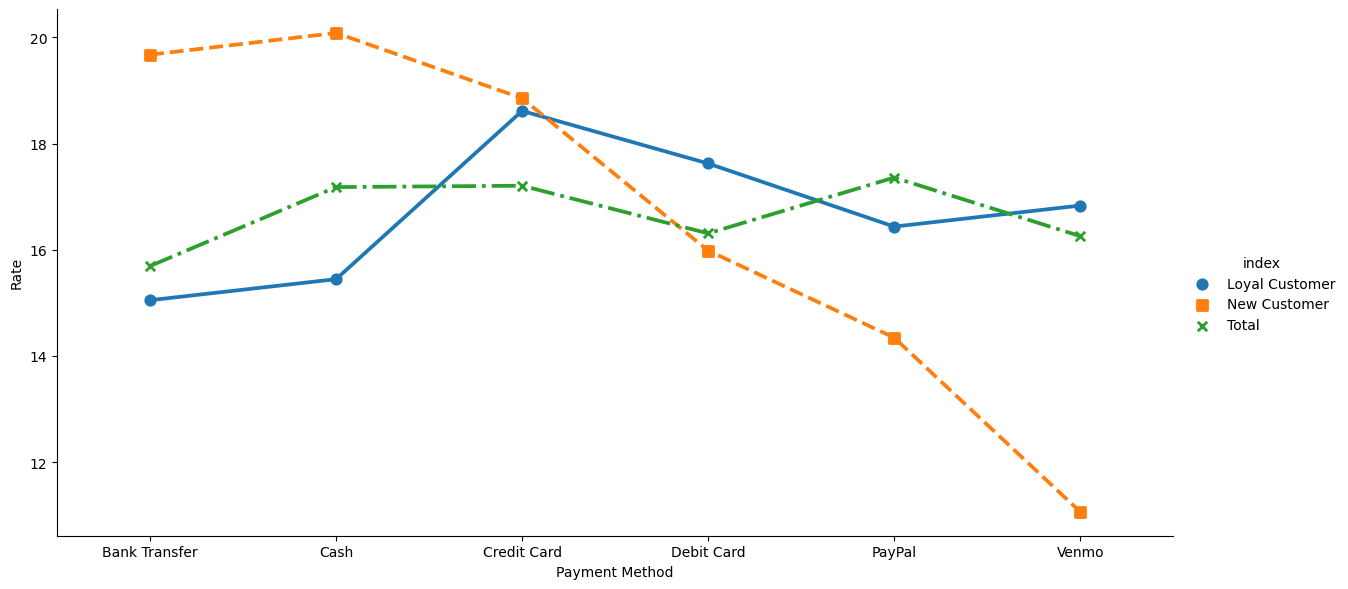

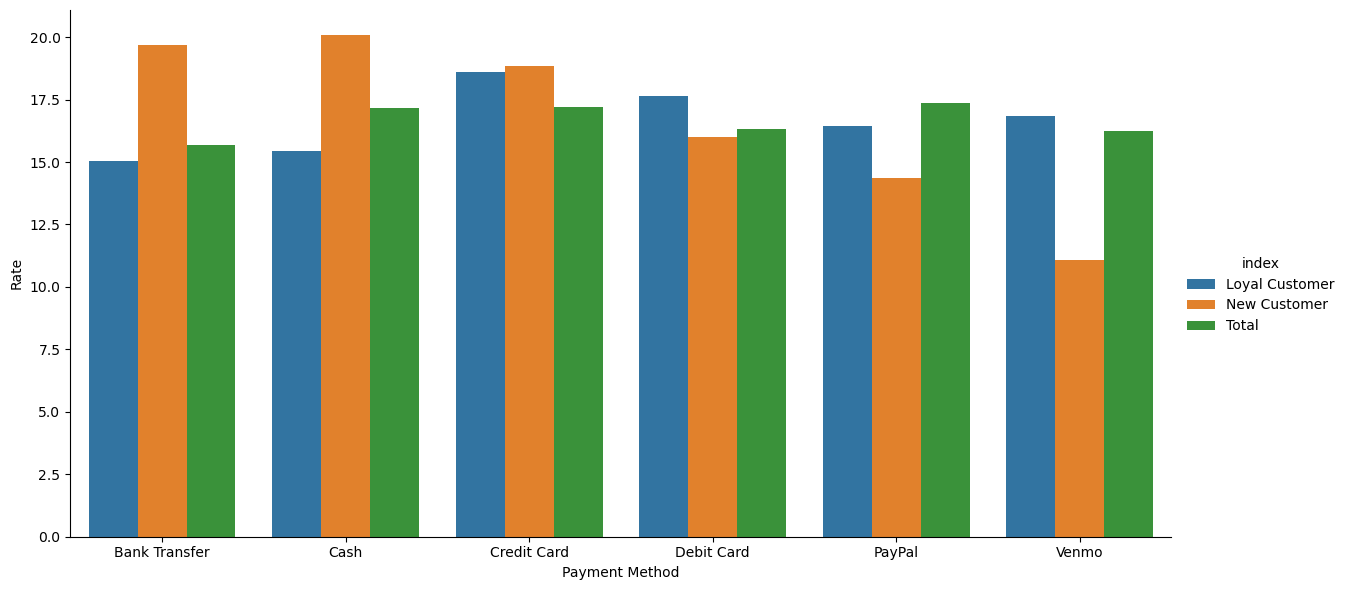

In [18]:
cat_plot = sns.catplot(x="Payment Method", y="Rate", hue="index", kind="point", data=df_payment, height=6, aspect=2, markers=["o", "s","x",'4','D'], linestyles=["-", "--","-.",'dashdot',':'])
bar_plot = sns.catplot(x="Payment Method", y="Rate", hue="index", kind="bar", data=df_payment, height=6, aspect=2)

C:\Users\win\AppData\Local\Temp\ipykernel_85384\1703038532.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_items=df_items.append(df['Item Purchased_new'].value_counts(normalize=True).to_frame().transpose())
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


,index,Item Purchased_new,Rate
2,Loyal Customer,accessories,12.673267
3,New Customer,accessories,11.065574
5,Total,accessories,12.641026
8,Loyal Customer,bags,8.118812
9,New Customer,bags,6.967213
11,Total,bags,7.589744
14,Loyal Customer,bottoms,20.792079
15,New Customer,bottoms,18.032787
17,Total,bottoms,19.897436
20,Loyal Customer,outers,8.910891


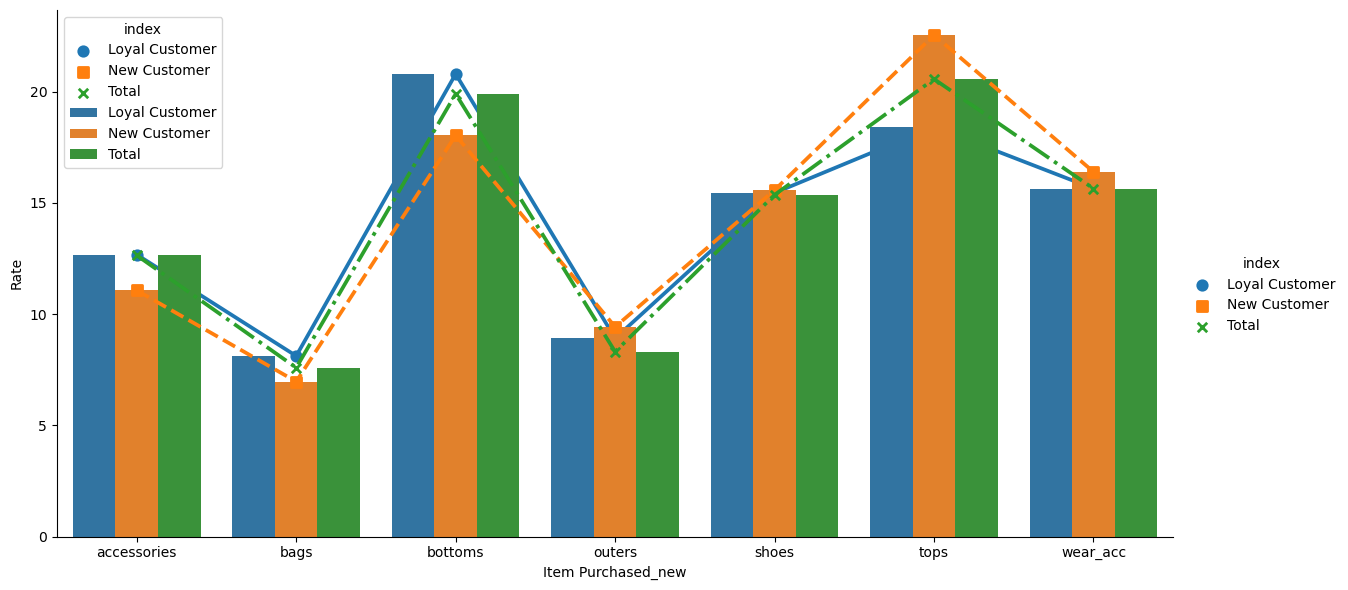

In [19]:
#df_items= df.groupby('is_vip')['Item Purchased_new'].value_counts(normalize=True).to_frame().sort_index().unstack().droplevel(level=0,axis=1)
##df_items = df_items.applymap(lambda x:x*100)
#df_items
#fig, ax = plt.subplots( figsize=(14,7) )

df_items = df.groupby('is_vip')['Item Purchased_new'].value_counts(normalize=True).to_frame().sort_index(level = 1).unstack().droplevel(level=0,axis=1)
df_items=df_items.append(df['Item Purchased_new'].value_counts(normalize=True).to_frame().transpose())
df_items= df_items.applymap(lambda x:x*100)
df_items= df_items.reset_index()

df_items = df_items.melt(id_vars=["index"], var_name="Item Purchased_new", value_name="Rate")
df_items.loc[df_items['index'] == 'Item Purchased_new', 'index'] = 'Total'
df_items = df_items[(df_items['index']=='New Customer') | (df_items['index']=='Loyal Customer') | (df_items['index']=='Total')]

sns.catplot(kind = 'point',data =df_items,x="Item Purchased_new", y="Rate", hue="index", height=6, aspect=2, markers=["o", "s","x",'4','D'], linestyles=["-", "--","-.",'dashdot',':'] )
bar_plot = sns.barplot(x="Item Purchased_new", y="Rate", hue="index", data=df_items)
df_items


#for p in ax.patches:
    #ax.text(p.get_x() + (p.get_width()/2), p.get_y() + p.get_height()+0.2, f"{p.get_height():.2f}" , ha='center')
#plt.ylim(5, None)

C:\Users\win\AppData\Local\Temp\ipykernel_85384\3426018348.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_items=df_items.append(df['Item Purchased_new'].value_counts(normalize=True).to_frame().transpose())
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


,index,Item Purchased_new,Rate
2,Loyal Customer,accessories,12.673267
3,New Customer,accessories,11.065574
5,Total,accessories,12.641026
8,Loyal Customer,bags,8.118812
9,New Customer,bags,6.967213
11,Total,bags,7.589744
14,Loyal Customer,bottoms,20.792079
15,New Customer,bottoms,18.032787
17,Total,bottoms,19.897436
20,Loyal Customer,outers,8.910891


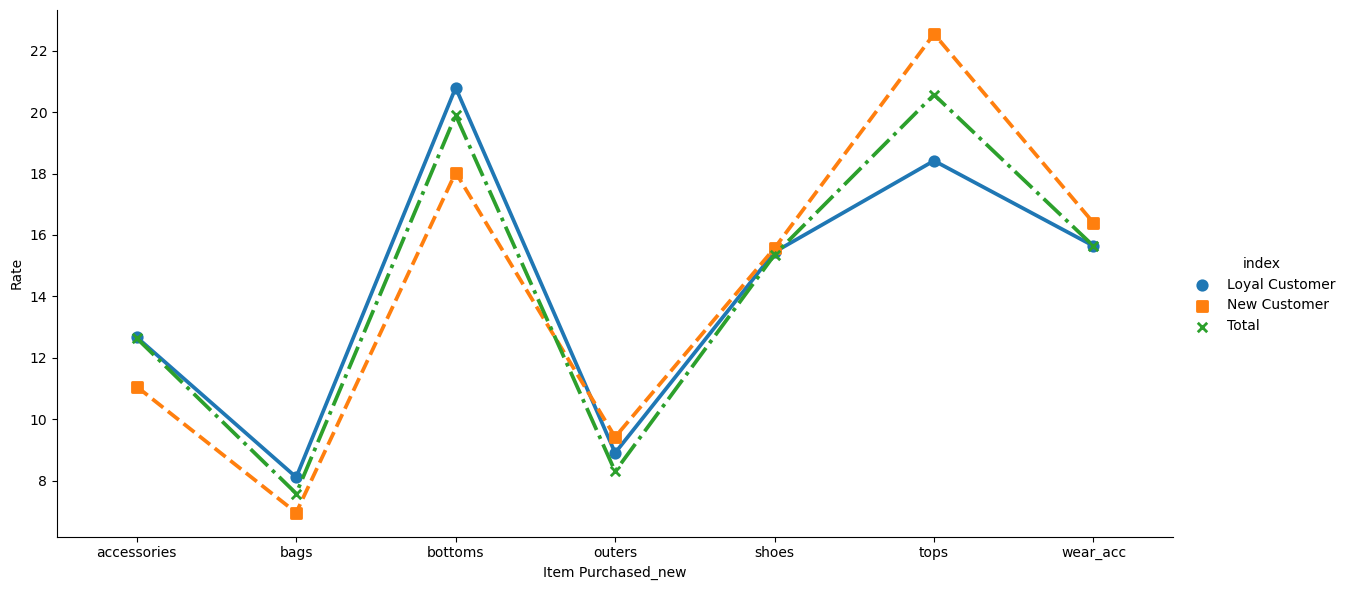

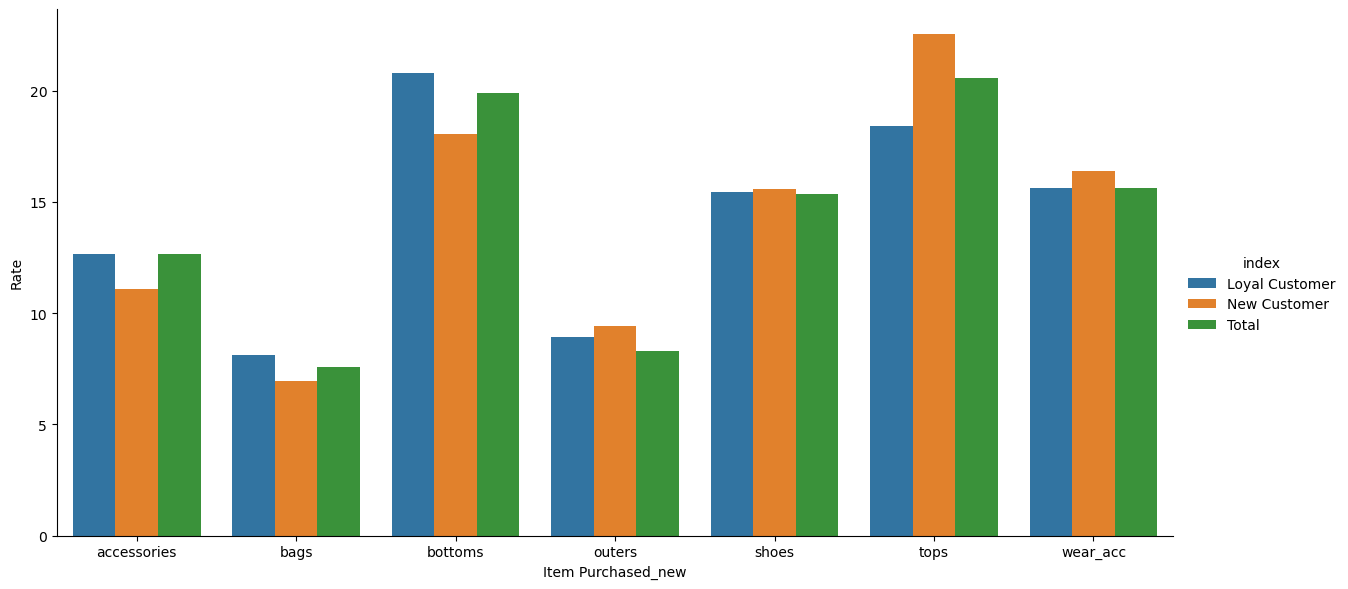

In [20]:
#df_items= df.groupby('is_vip')['Item Purchased_new'].value_counts(normalize=True).to_frame().sort_index().unstack().droplevel(level=0,axis=1)
##df_items = df_items.applymap(lambda x:x*100)
#df_items

df_items = df.groupby('is_vip')['Item Purchased_new'].value_counts(normalize=True).to_frame().sort_index(level = 1).unstack().droplevel(level=0,axis=1)
df_items=df_items.append(df['Item Purchased_new'].value_counts(normalize=True).to_frame().transpose())
df_items= df_items.applymap(lambda x:x*100)
df_items= df_items.reset_index()

df_items = df_items.melt(id_vars=["index"], var_name="Item Purchased_new", value_name="Rate")
df_items.loc[df_items['index'] == 'Item Purchased_new', 'index'] = 'Total'
df_items = df_items[(df_items['index']=='New Customer') | (df_items['index']=='Loyal Customer') | (df_items['index']=='Total')]

sns.catplot(kind = 'point',data =df_items,x="Item Purchased_new", y="Rate", hue="index", height=6, aspect=2, markers=["o", "s","x",'4','D'], linestyles=["-", "--","-.",'dashdot',':'] )
bar_plot = sns.catplot(x="Item Purchased_new", y="Rate", hue="index", kind="bar", data=df_items, height=6, aspect=2)
df_items

#plt.ylim(5, None)

In [22]:
df_gender = df.groupby('is_vip')['Gender'].value_counts(normalize=True,).to_frame().sort_index().unstack().droplevel(level=0,axis=1)
df_gender=df_gender.append(df['Gender'].value_counts(normalize=True).to_frame().transpose())
df_gender = df_gender.applymap(lambda x:x*100)
#df_gender.reset_index()

df_gender = df_gender.reset_index().melt(id_vars=["index"], var_name="Age", value_name="Rate")
df_gender.loc[df_gender['index'] == 'Gender', 'index'] = 'Total'
df_gender = df_gender[(df_gender['index']=='New Customer') | (df_gender['index']=='Loyal Customer') | (df_gender['index']=='Total')]
df_gender

C:\Users\win\AppData\Local\Temp\ipykernel_85384\2743353913.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_gender=df_gender.append(df['Gender'].value_counts(normalize=True).to_frame().transpose())


,index,Age,Rate
2,Loyal Customer,Female,29.70297
3,New Customer,Female,40.57377
5,Total,Female,32.00000
8,Loyal Customer,Male,70.29703
9,New Customer,Male,59.42623
11,Total,Male,68.00000


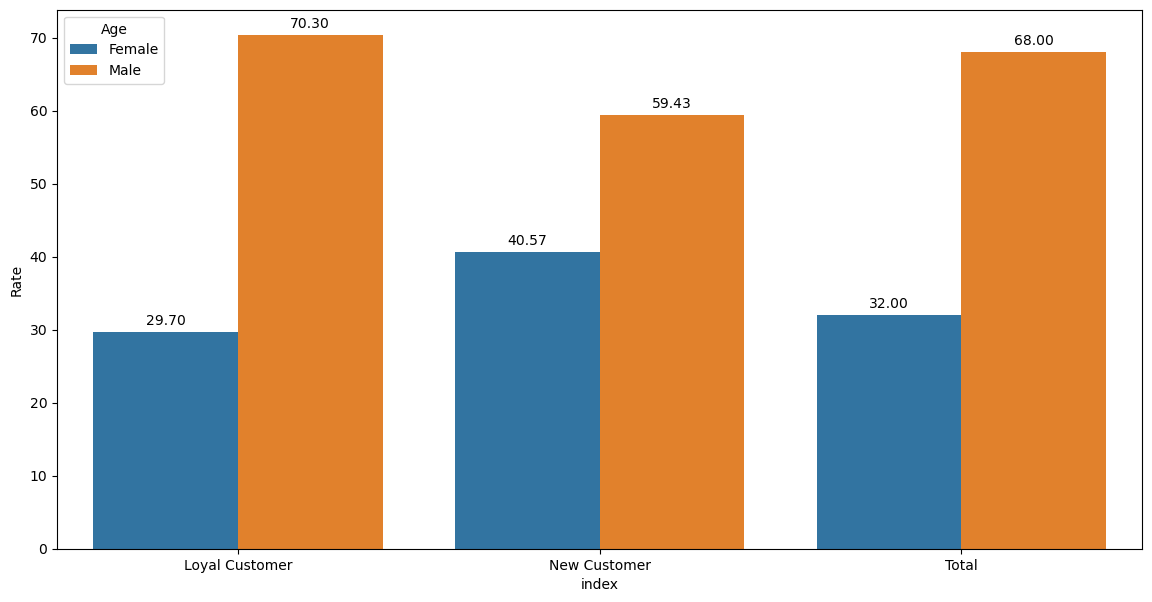

In [23]:
fig, ax = plt.subplots( figsize=(14,7) )


sns.barplot(data=df_gender, x='index',y='Rate', hue='Age')


for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2), p.get_y() + p.get_height()+1, f"{p.get_height():.2f}" , ha='center')

In [ ]:
df_items

In [24]:
df_money= df.groupby('is_vip')['Purchase Amount (USD)'].mean().to_frame()#.unstack().droplevel(level=0,axis=1)

df_money = df_money.reset_index().melt(id_vars=["is_vip"], var_name="Purchase Amount (USD)", value_name="mean")
#df_money = df_money.sort_values('mean')
df_money

,is_vip,Purchase Amount (USD),mean
0,InActive Customer,Purchase Amount (USD),62.796296
1,Light Customer,Purchase Amount (USD),52.635922
2,Loyal Customer,Purchase Amount (USD),71.300990
3,New Customer,Purchase Amount (USD),60.229508
4,Regural Customer,Purchase Amount (USD),58.585102


In [25]:
df_money= df.groupby('is_vip')['Purchase Amount (USD)'].mean().to_frame().reset_index()#.unstack().droplevel(level=0,axis=1)
#df_money.drop('Purchase Amount (USD)', axis=1, inplace=True)
df_money = df_money.append(df_money.iloc[-1],ignore_index=True)
df_money.iloc[-1] = ['Total',df['Purchase Amount (USD)'].mean()]
#df_money = df_money.reset_index().melt(id_vars=["is_vip"], var_name="Purchase Amount (USD)", value_name="mean")
df_money = df_money[(df_money['is_vip']=='New Customer') | (df_money['is_vip']=='Loyal Customer') | (df_money['is_vip']=='Total')]

df_money

C:\Users\win\AppData\Local\Temp\ipykernel_85384\1949386723.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_money = df_money.append(df_money.iloc[-1],ignore_index=True)


,is_vip,Purchase Amount (USD)
2,Loyal Customer,71.300990
3,New Customer,60.229508
5,Total,59.764359


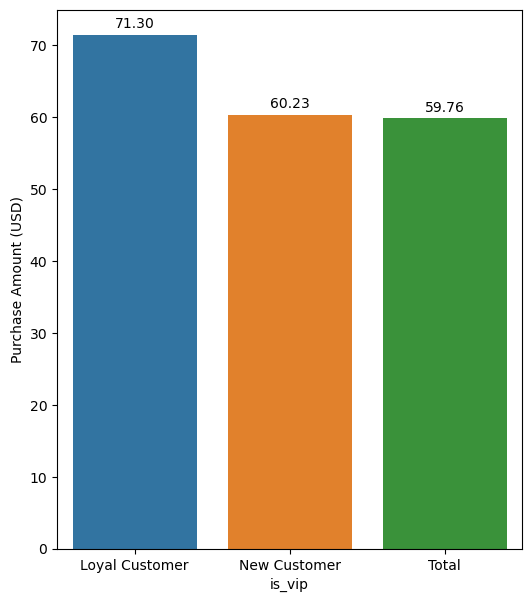

In [26]:
#sns.catplot(data=df_money, x='is_vip',y='Purchase Amount (USD)', kind='bar')


fig, ax = plt.subplots( figsize=(6,7) )


sns.barplot(data=df_money, x='is_vip',y='Purchase Amount (USD)')


for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2), p.get_y() + p.get_height()+1, f"{p.get_height():.2f}" , ha='center')

In [151]:
df_season = df.groupby('is_vip')['Season'].value_counts().to_frame().unstack().droplevel(level=0,axis=1)
df_season=df_season.append(df['Season'].value_counts(normalize=True).to_frame().transpose())
#df_season = df_season.applymap(lambda x:x*100)
#df_gender.reset_index()

df_season = df_season.reset_index().melt(id_vars=["index"], var_name="Season", value_name="Rate")
df_season.loc[df_season['index'] == 'Season', 'index'] = 'Total'
df_season = df_season[(df_season['index']=='New Customer') | (df_season['index']=='Loyal Customer') | (df_season['index']=='Total')]
df_season

C:\Users\win\AppData\Local\Temp\ipykernel_85384\1650372421.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_season=df_season.append(df['Season'].value_counts(normalize=True).to_frame().transpose())


,index,Season,Rate
2,Loyal Customer,Fall,117.000000
3,New Customer,Fall,56.000000
5,Total,Fall,0.250000
8,Loyal Customer,Spring,122.000000
9,New Customer,Spring,69.000000
11,Total,Spring,0.256154
14,Loyal Customer,Summer,117.000000
15,New Customer,Summer,62.000000
17,Total,Summer,0.244872
20,Loyal Customer,Winter,149.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


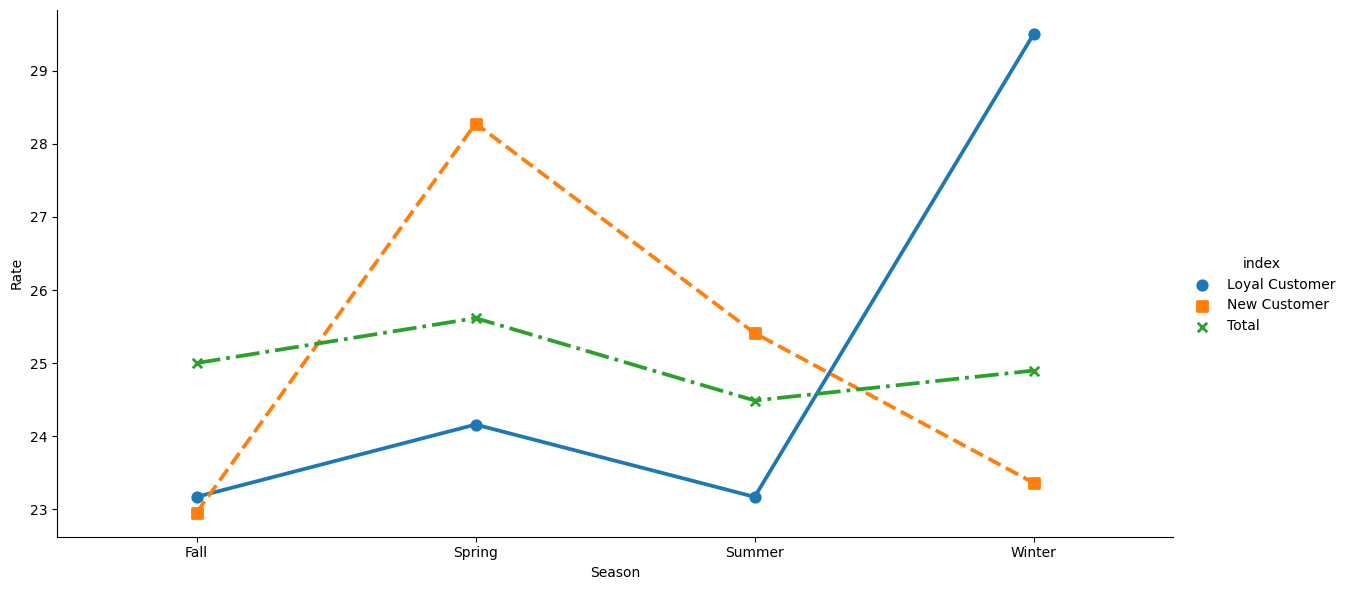

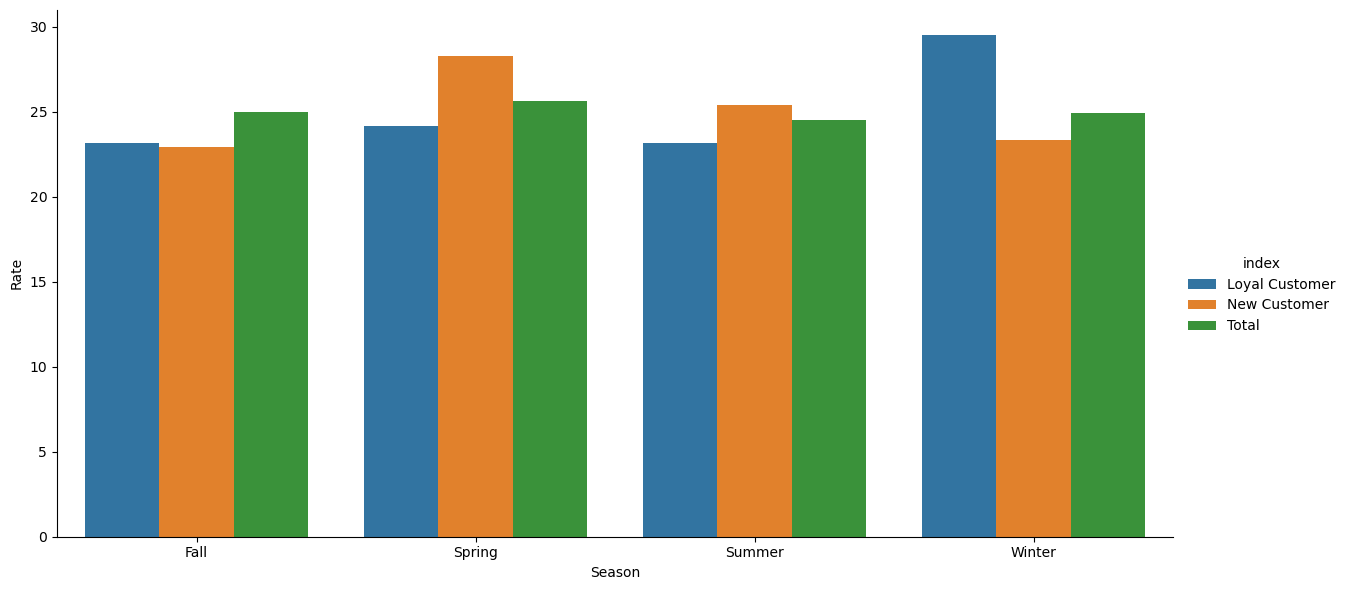

In [29]:

sns.catplot(kind = 'point',data =df_season,x="Season", y="Rate", hue="index", height=6, aspect=2, markers=["o", "s","x",'4','D'], linestyles=["-", "--","-.",'dashdot',':'] )
bar_plot = sns.catplot(x="Season", y="Rate", hue="index", kind="bar", data=df_season, height=6, aspect=2)

In [17]:
def get_normalized_counts(data, group_field, value_field, normalize=True):
    return (data.groupby(group_field)[value_field]
            .value_counts(normalize=normalize)
            .mul(100)
            .unstack(fill_value=0))

# Applying the function for Loyal, New, and all customers by 'Season' for 'Item Purchased_new'
loyal_item_purchases = get_normalized_counts(df[df['is_vip']=='Loyal Customer'], 'Season', 'Gender')
new_item_purchases = get_normalized_counts(df[df['is_vip']=='New Customer'], 'Season', 'Gender')
#all_item_purchases = get_normalized_counts(df, 'Season', 'Gender')

# Combining results into a single DataFrame for easy comparison
seasonal_item_purchases_comparison = pd.concat({
    'Loyal Customers': loyal_item_purchases,
    'New Customers': new_item_purchases#,
    #'All Customers': all_item_purchases
}, axis=1)

seasonal_item_purchases_comparison

Loyal Customers            New Customers           
Gender          Female       Male        Female       Male
Season                                                    
Fall         29.914530  70.085470     39.285714  60.714286
Spring       31.147541  68.852459     49.275362  50.724638
Summer       29.059829  70.940171     38.709677  61.290323
Winter       28.859060  71.140940     33.333333  66.666667

In [163]:
pd.set_option('display.max_columns', None)
season_item_vip = seasonal_item_purchases_comparison.reset_index().melt(
    id_vars=['Season'],
    var_name=['Customer Group', 'Gender'],
    value_name='Rate'
)

season_item_vip.tail(40)
#pd.options.display.max_rows = 60
#pd.options.display.max_columns = 20


,Season,Customer Group,Gender,Rate
0,Fall,Loyal Customers,Female,35
1,Spring,Loyal Customers,Female,38
2,Summer,Loyal Customers,Female,34
3,Winter,Loyal Customers,Female,43
4,Fall,Loyal Customers,Male,82
5,Spring,Loyal Customers,Male,84
6,Summer,Loyal Customers,Male,83
7,Winter,Loyal Customers,Male,106
8,Fall,New Customers,Female,22
9,Spring,New Customers,Female,34


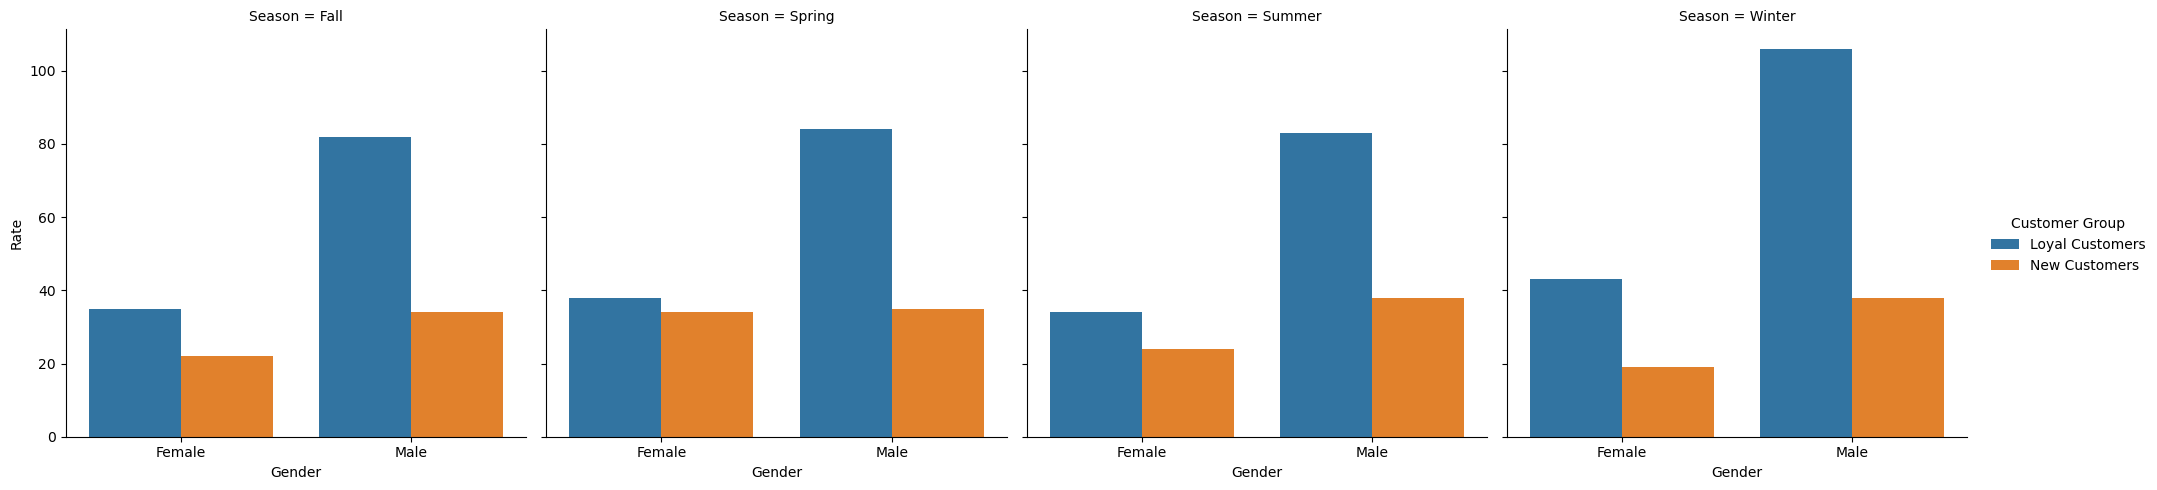

In [164]:
sns.catplot(data=season_item_vip , x = 'Gender' , y = 'Rate', hue = 'Customer Group', col='Season', kind='bar')

In [18]:



# Applying the function for Loyal, New, and all customers by 'Season' for 'Item Purchased_new'
loyal_subscribe_discount = get_normalized_counts(df[df['is_vip']=='Loyal Customer'], 'Payment Method', 'Discount Applied')
new_subscribe_discount = get_normalized_counts(df[df['is_vip']=='New Customer'], 'Payment Method', 'Discount Applied')
all_subscribe_discount = get_normalized_counts(df, 'Payment Method', 'Discount Applied')

# Combining results into a single DataFrame for easy comparison
subscribe_discount_comparison = pd.concat({
    'Loyal Customers': loyal_subscribe_discount,
    'New Customers': new_subscribe_discount,
    'All Customers': all_subscribe_discount
}, axis=1)




sub_discount_vip = subscribe_discount_comparison.reset_index().melt(
    id_vars=['Payment Method'],
    var_name=['Customer Group', 'Discount Applied'],
    value_name='Rate'
)

sub_discount_vip
#subscribe_discount_comparison
#pd.options.display.max_rows = 60
#pd.options.display.max_columns = 20


,Payment Method,Customer Group,Discount Applied,Rate
0,Bank Transfer,Loyal Customers,No,56.578947
1,Cash,Loyal Customers,No,50.000000
2,Credit Card,Loyal Customers,No,60.638298
3,Debit Card,Loyal Customers,No,56.179775
4,PayPal,Loyal Customers,No,50.602410
5,Venmo,Loyal Customers,No,54.117647
6,Bank Transfer,Loyal Customers,Yes,43.421053
7,Cash,Loyal Customers,Yes,50.000000
8,Credit Card,Loyal Customers,Yes,39.361702
9,Debit Card,Loyal Customers,Yes,43.820225


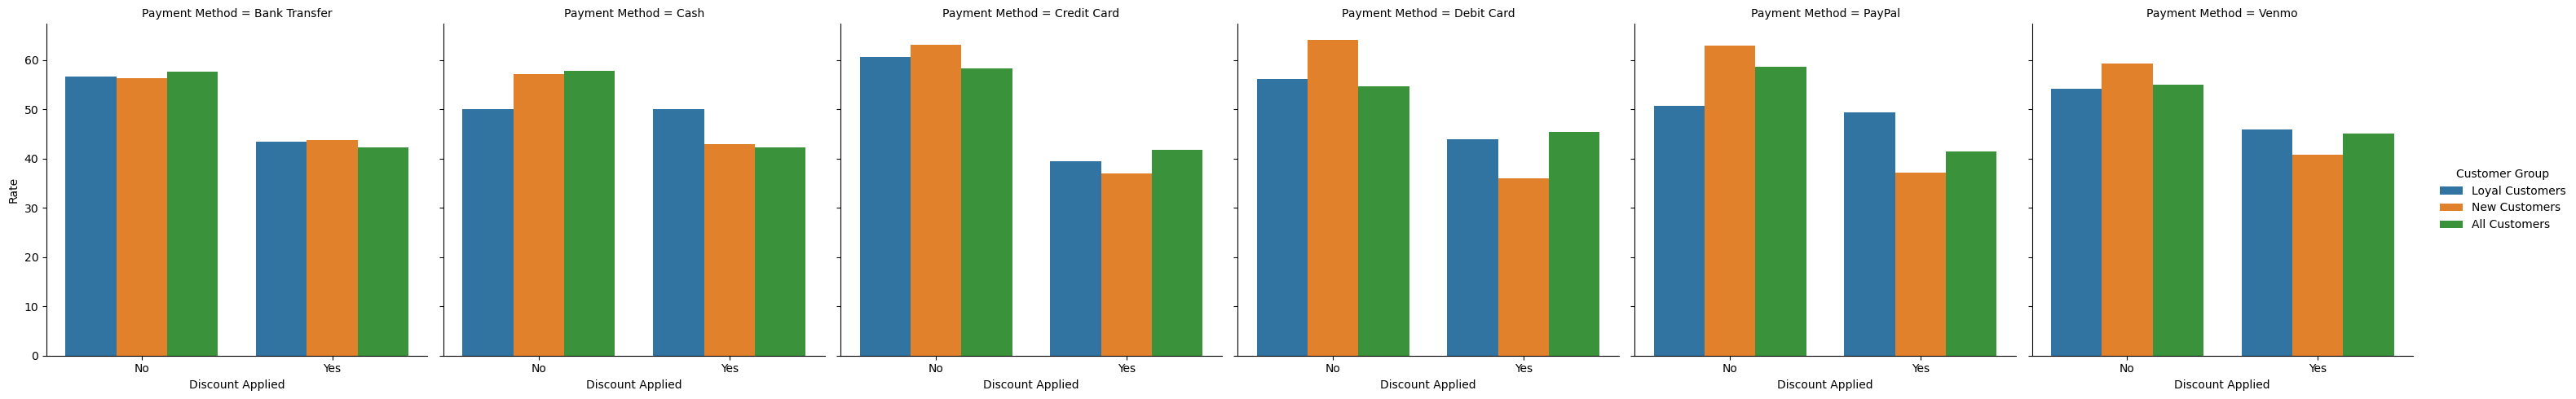

In [19]:
sns.catplot(data=sub_discount_vip , x = 'Discount Applied' , y = 'Rate', hue = 'Customer Group', col='Payment Method', kind='bar')

In [146]:
#location_new


# Applying the function for Loyal, New, and all customers by 'Season' for 'Item Purchased_new'
loyal_subscribe_discount = get_normalized_counts(df[df['is_vip']=='Loyal Customer'], 'Discount Applied', 'location_new')
new_subscribe_discount = get_normalized_counts(df[df['is_vip']=='New Customer'], 'Season', 'location_new')
all_subscribe_discount = get_normalized_counts(df, 'Season', 'location_new')

# Combining results into a single DataFrame for easy comparison
subscribe_discount_comparison = pd.concat({
    'Loyal Customers': loyal_subscribe_discount,
    'New Customers': new_subscribe_discount,
    'All Customers': all_subscribe_discount
}, axis=1)




sub_discount_vip = subscribe_discount_comparison.reset_index().melt(
    id_vars=['Season'],
    var_name=['Customer Group', 'location_new'],
    value_name='Rate'
)

sub_discount_vip

#subscribe_discount_comparison
#pd.options.display.max_rows = 60
#pd.options.display.max_columns = 20


,Season,Customer Group,location_new,Rate
0,Fall,Loyal Customers,Midwest,23.931624
1,Spring,Loyal Customers,Midwest,23.770492
2,Summer,Loyal Customers,Midwest,23.076923
3,Winter,Loyal Customers,Midwest,22.147651
4,Fall,Loyal Customers,Northeast,15.384615
5,Spring,Loyal Customers,Northeast,13.934426
6,Summer,Loyal Customers,Northeast,17.094017
7,Winter,Loyal Customers,Northeast,20.134228
8,Fall,Loyal Customers,South,28.205128
9,Spring,Loyal Customers,South,25.409836


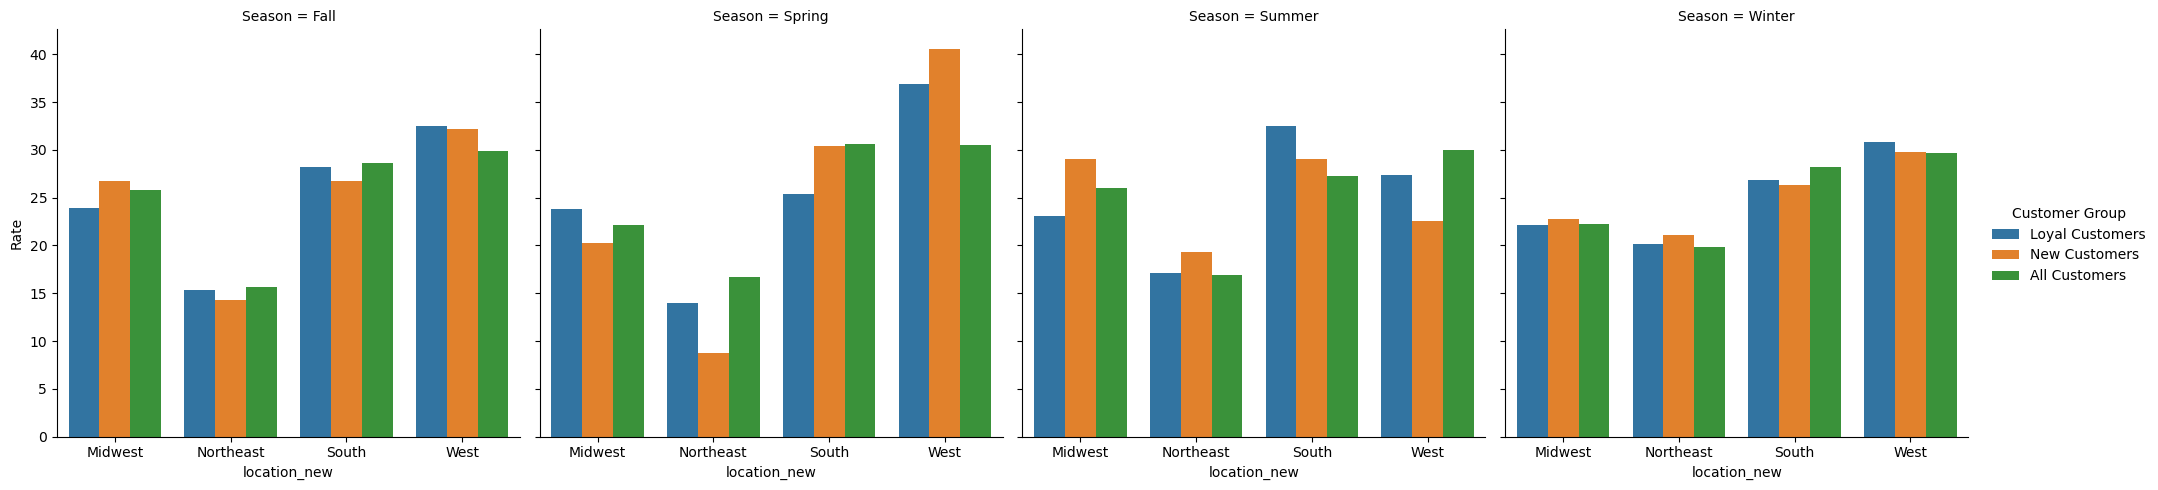

In [147]:
sns.catplot(data=sub_discount_vip , x = 'location_new' , y = 'Rate', hue = 'Customer Group', col='Season', kind='bar')

In [124]:
df_rate = df.groupby('is_vip')['Review Rating'].value_counts(normalize=True,).to_frame().unstack().droplevel(level=0,axis=1)
df_rate=df_rate.append(df['Review Rating'].value_counts(normalize=True).to_frame().transpose())
df_rate = df_rate.applymap(lambda x:x*100)
#df_gender.reset_index()

df_rate = df_rate.reset_index().melt(id_vars=["index"], var_name="Review Rating", value_name="Rate")
df_rate.loc[df_rate['index'] == 'Review Rating', 'index'] = 'Total'
df_rate = df_rate[(df_rate['index']=='New Customer') | (df_rate['index']=='Loyal Customer') | (df_rate['index']=='Total')]
df_rate




#subscribe_discount_comparison
#pd.options.display.max_rows = 60
#pd.options.display.max_columns = 20


C:\Users\win\AppData\Local\Temp\ipykernel_85384\582631771.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rate=df_rate.append(df['Review Rating'].value_counts(normalize=True).to_frame().transpose())


,index,Review Rating,Rate
2,Loyal Customer,2.5,0.990099
3,New Customer,2.5,2.459016
5,Total,2.5,1.692308
8,Loyal Customer,2.6,2.970297
9,New Customer,2.6,5.327869
...,...,...,...
147,New Customer,4.9,4.098361
149,Total,4.9,4.256410
152,Loyal Customer,5.0,1.782178
153,New Customer,5.0,2.049180


In [134]:
df_rate= df.groupby('is_vip')['Review Rating'].mean().to_frame()#.unstack().droplevel(level=0,axis=1)

df_rate = df_rate.reset_index().melt(id_vars=["is_vip"], var_name="Review Rating", value_name="mean")
#df_money = df_money.sort_values('mean')Z
df_rate

,is_vip,Review Rating,mean
0,InActive Customer,Review Rating,3.874074
1,Light Customer,Review Rating,3.782282
2,Loyal Customer,Review Rating,3.816040
3,New Customer,Review Rating,3.731967
4,Regural Customer,Review Rating,3.731695


C:\Users\win\AppData\Local\Temp\ipykernel_85384\5443310.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rate = df_rate.append(df_rate.iloc[-1],ignore_index=True)


(3.5, 4.0068415841584155)

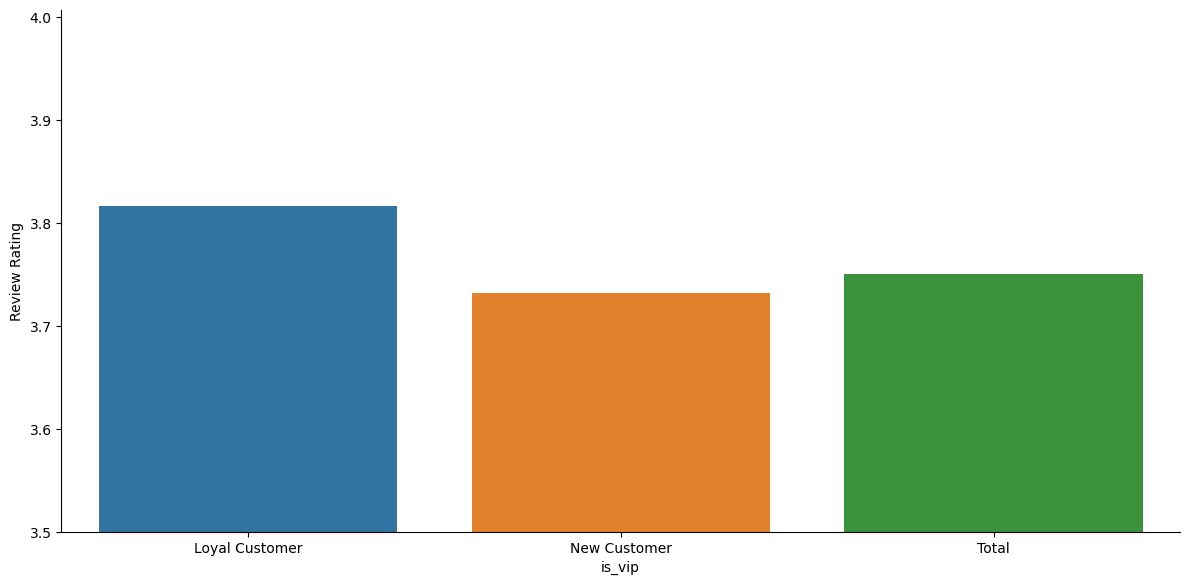

In [140]:
df_rate= df.groupby('is_vip')['Review Rating'].mean().to_frame().reset_index()#.unstack().droplevel(level=0,axis=1)
#df_money.drop('Purchase Amount (USD)', axis=1, inplace=True)
df_rate = df_rate.append(df_rate.iloc[-1],ignore_index=True)
df_rate.iloc[-1] = ['Total',df['Review Rating'].mean()]
#df_money = df_money.reset_index().melt(id_vars=["is_vip"], var_name="Purchase Amount (USD)", value_name="mean")
df_rate = df_rate[(df_rate['is_vip']=='New Customer') | (df_rate['is_vip']=='Loyal Customer') | (df_rate['is_vip']=='Total')]

sns.catplot(data=df_rate, kind='bar', x='is_vip', y = 'Review Rating' , height=6, aspect=2)
plt.ylim(3.5, None)

In [137]:
df_rate3= df.groupby('is_vip')['Review Rating'].median().to_frame().reset_index()#.unstack().droplevel(level=0,axis=1)
#df_money.drop('Purchase Amount (USD)', axis=1, inplace=True)
df_rate3 = df_rate3.append(df_rate.iloc[-1],ignore_index=True)
df_rate3.iloc[-1] = ['Total',df['Review Rating'].median()]
#df_money = df_money.reset_index().melt(id_vars=["is_vip"], var_name="Purchase Amount (USD)", value_name="mean")
df_rate3 = df_rate3[(df_rate3['is_vip']=='New Customer') | (df_rate3['is_vip']=='Loyal Customer') | (df_rate3['is_vip']=='Total')]

df_rate3

C:\Users\win\AppData\Local\Temp\ipykernel_85384\3769134309.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rate = df_rate.append(df_rate.iloc[-1],ignore_index=True)


,is_vip,Review Rating
2,Loyal Customer,3.9
3,New Customer,3.7
5,Total,3.7


In [136]:
df_rate2= df.groupby('is_vip')['Review Rating'].std().to_frame().reset_index()#.unstack().droplevel(level=0,axis=1)
#df_money.drop('Purchase Amount (USD)', axis=1, inplace=True)
df_rate2 = df_rate2.append(df_rate.iloc[-1],ignore_index=True)
df_rate2.iloc[-1] = ['Total',df['Review Rating'].std()]
#df_money = df_money.reset_index().melt(id_vars=["is_vip"], var_name="Purchase Amount (USD)", value_name="mean")
df_rate2 = df_rate2[(df_rate2['is_vip']=='New Customer') | (df_rate2['is_vip']=='Loyal Customer') | (df_rate2['is_vip']=='Total')]

df_rate2

C:\Users\win\AppData\Local\Temp\ipykernel_85384\2488140160.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rate2 = df_rate2.append(df_rate.iloc[-1],ignore_index=True)


,is_vip,Review Rating
2,Loyal Customer,0.712558
3,New Customer,0.708765
5,Total,0.716223
